### Задання 1
Використовуючи датасет з файлу Position_Salaries.csv, побудуйте модель поліноміальної регрессії.


In [116]:
import pandas as pd
import numpy as np
import sklearn
import openpyxl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [67]:
df=pd.read_csv('Position_Salaries.csv')
df

,Unnamed: 0,Position,Level,Salary
0,0,Business Analyst,1,45000
1,1,Junior Consultant,2,50000
2,2,Senior Consultant,3,60000
3,3,Manager,4,80000
4,4,Country Manager,5,110000
5,5,Region Manager,6,150000
6,6,Partner,7,200000
7,7,Senior Partner,8,300000
8,8,C-level,9,500000
9,9,CEO,10,1000000


In [4]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


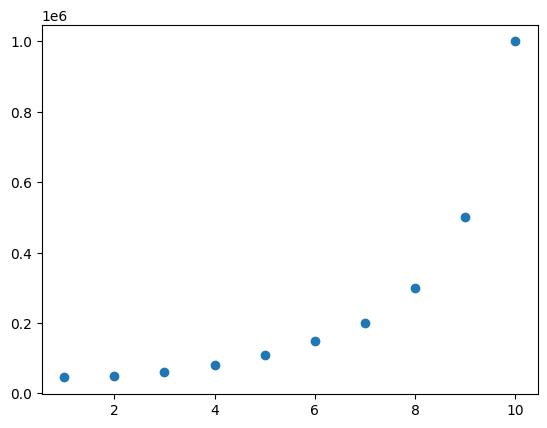

In [8]:
plt.scatter(df['Level'],df['Salary'])

#### Побудуємо поліноміальну регресію за допомогою бібліотеки numpy, використавши функцію poly1d. Проведемо розрахунки для  поліному другого, третього та четвертого ступеню. 

Функція поліноміальної регресії для моделі другого ступеню має вигляд : 
            2
1.943e+04 x - 1.329e+05 x + 2.322e+05 

Функція поліноміальної регресії для моделі третьго ступеню має вигляд : 
       3             2
4120 x - 4.855e+04 x + 1.807e+05 x - 1.213e+05 

Функція поліноміальної регресії для моделі четвертого ступеню має вигляд : 
        4             3             2
890.2 x - 1.546e+04 x + 9.477e+04 x - 2.11e+05 x + 1.842e+05 



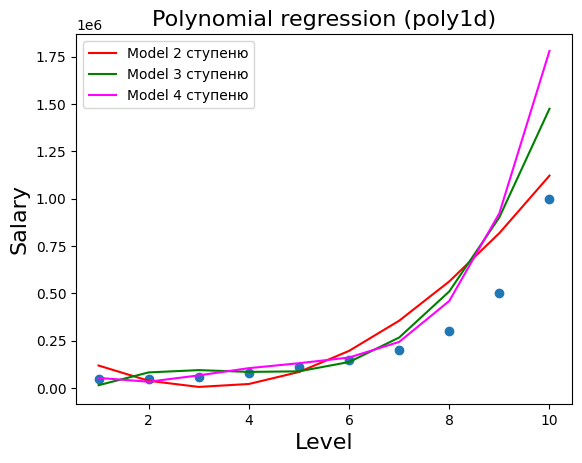

In [131]:
model1 = np.poly1d(np.polyfit(df['Level'],df['Salary'], 2))
model2 = np.poly1d(np.polyfit(df['Level'],df['Salary'], 3))
model3 = np.poly1d(np.polyfit(df['Level'],df['Salary'], 4))
X_test = np.linspace(1, 11, 10)
plt.scatter(df['Level'],df['Salary'])
plt.plot(df['Level'], model1(X_test), color='Red', label=f'Model 2 ступеню')
plt.plot(df['Level'], model2(X_test), color='Green', label=f'Model 3 ступеню')
plt.plot(df['Level'], model3(X_test), color='Magenta', label=f'Model 4 ступеню')
plt.xlabel('Level',fontsize=16)
plt.ylabel('Salary',fontsize=16)
plt.title('Polynomial regression (poly1d)',fontsize=16)
plt.legend()
print('Функція поліноміальної регресії для моделі другого ступеню має вигляд : \n',model1,'\n')
print('Функція поліноміальної регресії для моделі третьго ступеню має вигляд : \n',model2,'\n')
print('Функція поліноміальної регресії для моделі четвертого ступеню має вигляд : \n',model3,'\n')

#### Побудуємо поліноміальну регресію за допомогою бібліотеки sklearn, використавши функцію PolynomialFeatures. Проведемо розрахунки для поліному другого, третього та четвертого ступеню.

Достовірність моделі 2 ступеню : Score= 0.9162
Достовірність моделі 3 ступеню : Score= 0.9812
Достовірність моделі 4 ступеню : Score= 0.9974


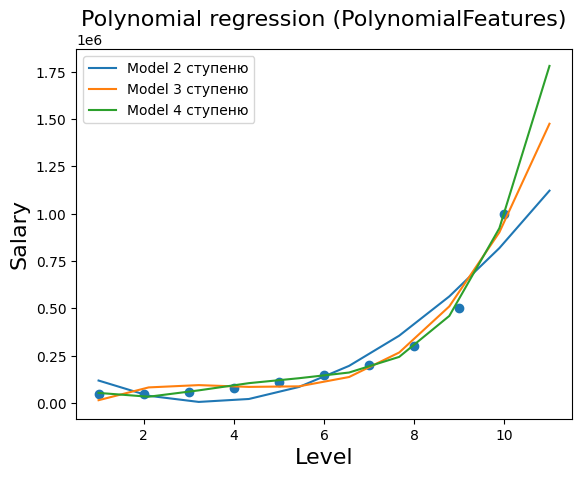

In [130]:
from sklearn.pipeline import Pipeline
X=np.array(df[['Level']])
y=np.array(df[['Salary']])
for i in range(2,5):
    Input=[('polynomial',PolynomialFeatures(degree=i)),('modal',LinearRegression())]
    pipe=Pipeline(Input)
    pipe.fit(X,y)
    y_pred=pipe.predict(X_test.reshape(-1,1))
    print('Достовірність моделі {} ступеню : Score= {:.4f}'.format(i,pipe.score(X.reshape(-1,1), y.reshape(-1,1))))
    plt.plot(X_test, y_pred, label=f'Model {i} ступеню')
plt.scatter(df['Level'],df['Salary'])
plt.xlabel('Level',fontsize=16)
plt.ylabel('Salary',fontsize=16)
plt.title('Polynomial regression (PolynomialFeatures)',fontsize=16)
plt.legend()